# OUTLIER & NOVELTY DETECTION
---
Materials prepared, or collected and modified by:    
__Pawel Rosikiewicz__, www.SimpleAI.ch   


## CONTENT
* My Cheatshits on logistic regression
* Code examples

![outliers_slide_01](images/logreg_01.png)

![outliers_slide_01](images/logreg_02.png)

![outliers_slide_01](images/logreg_03.jpeg)

In [1]:
import matplotlib.pyplot as plt # for making plots, 
import matplotlib as mpl # basic functions for plots
import numpy as np # support for multi-dimensional arrays
import pandas as pd # dataframes in python
import random # random number generators
import glob # list names in folders that match Unix shell patterns
import re # regular expressions, 
import os # directory operations,  
import seaborn as sns # advanced plots for statistics,
import scipy.stats as stats # statistics and technical programming, 
import warnings
%matplotlib inline

## Plot sigmoid function 
a function used to transform lod(odds) into probabilities

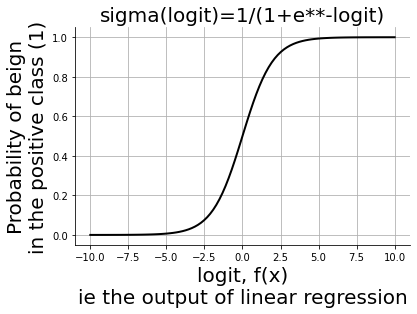

In [2]:
# Logistig regression - example - how the probability is calulated for probits, 
x = np.linspace(-10,10,100)
y = 1/(1+np.e**(-x))
plt.plot(x,y, color="black", lw=2)
plt.grid()
plt.title("sigma(logit)=1/(1+e**-logit)", fontsize=20)
plt.ylabel("Probability of beign\nin the positive class (1)", fontsize=20)
plt.xlabel("logit, f(x)\nie the output of linear regression", fontsize=20)
sns.despine()

## Binary classyfication with Logistic Regression
---

### Create Example Data

The goal of this example, is present how does the system works, on an easy example.
Thereofre, we will create example dataset wiht 1000 data points, using sklearn make_classification. It will have 2 numeric features, and two classes 0/1 in target variable.
for more complicated examples of binary classyfication, you may see:
* __Titanic datasets exploration at kaggle__, https://www.kaggle.com/code/mnassrib/titanic-logistic-regression-with-python/notebook 
* __PriceHook__, my project, notebook 2, and 3 where I used logistic regression for classyficaiton of apartments https://github.com/PawelRosikiewicz/PriceHook  


In [109]:
from sklearn.datasets import make_classification # creates simple data egxample

# create the data with 1000 samples, 2 features, and 2 class labels in target variable
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2, # The number of informative features
    n_redundant=0, # random linear combinations of the informative features.
    n_repeated=0, # duplicated features, either informative or redundant
    n_clusters_per_class=1, # nr. of "blobs" per class, ≤feature_nr/class
    n_classes=2,
    random_state=1
)

# chek the data
print("data: ", X.shape)
print("labels: ", y.shape) 

data:  (1000, 2)
labels:  (1000,)


### Inspect Dataset
create summary for all variables with my EDA helper functions
* how many data points have missing data?
* do you see any features wiht unbalanced class composition?
* target variable
    * how many classes are there?
    * are these classes balanced?

In [110]:
# check target variable
'''should be balanced, binary, and without missing data'''
print(pd.Series(y).value_counts())

0    500
1    500
dtype: int64


In [111]:
# prepare data frame wiht all data, for easy access and column names 
colnames = [f"feature_{x}" for x in np.arange(X.shape[1]).tolist()]
colnames.append("target")
data_df = pd.concat([pd.DataFrame(X),pd.Series(y)], axis=1)
data_df.columns=colnames

# see the data
data_df.head(3)

,feature_0,feature_1,target
0,1.536830,-1.398694,1
1,1.369176,-0.637344,1
2,0.502318,-0.459105,1


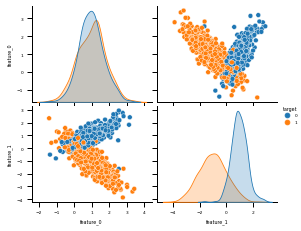

In [112]:
sns.set_context( 'paper' , font_scale = 0.5)
g = sns.pairplot(data_df, hue="target");
g.fig.set_size_inches(4,3)

you may check if features used for class prediction are normally distributed

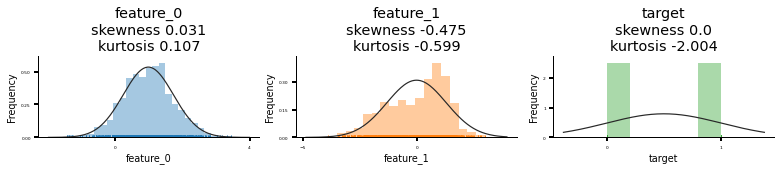

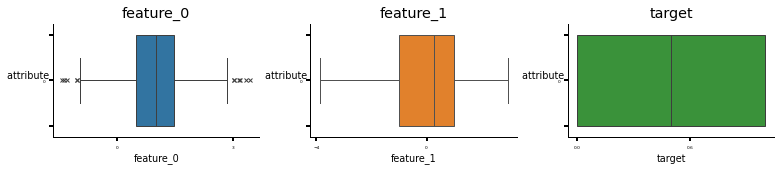

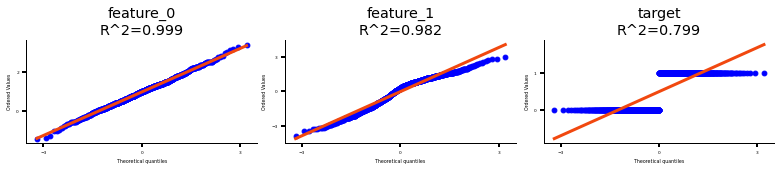

In [117]:
from src.utils.DataFrameExplorer_distribusion import normality_plots, feature_distribution
warnings.filterwarnings("ignore") # for depracietad function names,

# plot, with my helper function
for plot_type in ["hist", "box", "probplot"]:   
    normality_plots(
        plot_type=plot_type,
        df=data_df,  
        names= data_df.columns.values.tolist(), # colname to display
        figscale=1.2, #color="forestgreen",
        distplot_dct={
            "norm_hist":True, "rug":True, "kde":False , 
            "fit":stats.norm,"hist_kws":{"linewidth":0.5}}
    )

### Create a pipeline with sklearn functions,  

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline # similar function Pipeline() exist in which the user provides the 

#### (1) Split into train/test sets

In [119]:
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.3, random_state=0)

#### (2) Build and fit the model, 

In [120]:
# Create the estimator
logreg = make_pipeline(
    StandardScaler(), 
    LogisticRegression(solver='liblinear') # the solver must be specified, 
)                                          # otherwise it wil raise an error, 
                                           
# Fit it to train data
logreg.fit(X_tr, y_tr);

#### (3) Evaluate model

a) print accuracy ((TP+TN)/(TP+TN+FP+FN))


In [128]:
# print accuracy
print(f'Accuracy: {logreg.score(X_te, y_te)}')

Accuracy: 0.9


b) classyfication report
we can get more details with classyficaiotn report. The report provides us with __sensitivity (TP/(TP+FN))__, __specificity (TP/(TP+FP))__ and __f1 statistics (2x(spec.*sens.)/(spec.+sens.)) in its upper part. The lower part, shows only the __accuracy score__ ((TP+TN)/(TP+TN+FP+FN)), if applied for binary classyfication, and it will be different for multiclass classyficaiotn problems with different class number examples.

In details you will see, looking from the top of the classyficaiton report table:

in binary classification, 
- recall of the negative class == “specificity”, - top -
- recall of the positive class == “sensitivity”, - bottom -
 
The reported averages

-	Micro average 
(averaging the total true positives, false negatives and false positives)) it is different when calculated for multiple classes 
Otherwise == overall accuracy
            
-	macro average (averaging the unweighted mean per label),
-	weighted average (averaging the support-weighted mean per label), 
              ...
-	sample average (only for multilabel classification). 



In [122]:
from sklearn.metrics import classification_report

report = classification_report(y_true=y_te, y_pred=logreg.predict(X_te))
print(report)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       151
           1       0.88      0.92      0.90       149

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



c) you may also want to see on raw results wiht confusion matrix

In [123]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_true=y_te, y_pred=logreg.predict(X_te))
pd.DataFrame(
    matrix,
    columns=['pred:0','pred:1'],
    index=['True:0','Ttue:1']
)

,pred:0,pred:1
True:0,133,18
Ttue:1,12,137


and you may confirm that the results are ok, by summing up the rows, and comparins with class counts in y_te

In [124]:
print(pd.Series(y_te).value_counts())

0    151
1    149
dtype: int64


#### (4) finally, we can use ROC and PR curves to check:
    * how our model is working 
    * and whther we coudl improve the prediciton by chnaging the threshold used to classify points into either 1 o 0 class

In [125]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

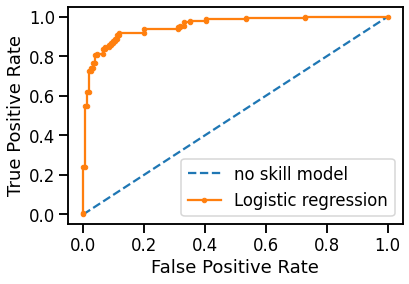

In [126]:
# predict probabilities & 
"keep probabilities for the positive outcome only"
lr_probs = logreg.predict_proba(X_te)
lr_probs = lr_probs[:, 1]

# generate a no skill prediction (majority class), 
"any value will do as long as it is the same for all targets"
ns_probs = [1 for _ in range(len(y_te))]
# generate data for model predicting only one class
no_skill = len(y_te[y_te==1]) / len(y_te)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_te, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_te, lr_probs)

# calulated area under the curve


# plot the roc curve for the model
sns.set_context("talk")
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='no skill model')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic regression')

# labels & legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show();

we may try to adjust threshold using the information provided by the roc_curve analysis

In [127]:
# ROC curve
fpr, tpr, thresholds = roc_curve(
    y_true    = y_te, 
    y_score   = logreg.predict_proba(X_te)[:, 1]
)

# place the results in df, 
roc_results = pd.DataFrame({
    'thresholds': thresholds,
    'fpr': fpr,                # x-axis: false positive rate: FDR = FP/(FP+TN)
    'tpr recal': tpr,       # y-axis: Recal, TP rate; TPR = TP/(TP+FN)
})

roc_results.sort_values(by="tpr recal", ascending=False)

,thresholds,fpr,tpr recal
49,0.000024,1.000000,1.000000
48,0.012642,0.728477,1.000000
47,0.012975,0.728477,0.993289
46,0.043831,0.536424,0.993289
45,0.045198,0.536424,0.986577
44,0.087063,0.403974,0.986577
43,0.087914,0.403974,0.979866
42,0.098328,0.350993,0.979866
41,0.099319,0.350993,0.973154
40,0.127383,0.331126,0.973154


#### (d) in the last part we may visualize decision surface for our clients, using different combinaitons of features


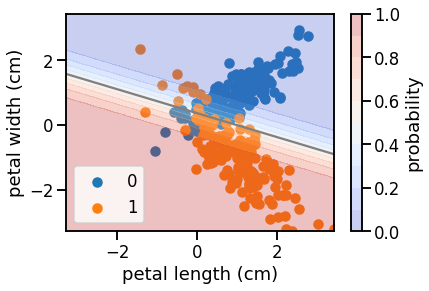

In [152]:
from src.utils.DataFrameExplorer_simple_plots import plot_decision_surface

plot_decision_surface(X_te, y_te, logreg)